Import Libraries

In [159]:
import os
import pandas as pd
import numpy as np
import json


In [160]:
import warnings
warnings.filterwarnings("ignore")

In [161]:
categorized_questions_file = 'categorized_questions.jsonl'

# read categorized questions
categorized_questions = []
with open(categorized_questions_file, 'r') as f:
    for line in f:
        categorized_questions.append(json.loads(line))

# List of all questions
categorized_questions_list = [list(q.values())[0] for q in categorized_questions]

# create a dictionary to map questions to their categories
question_to_category = {q['Question']: q['Category'] for q in categorized_questions}

In [162]:
# all unique categories in question_to_category
unique_categories = sorted(set(question_to_category.values()))
print(f"Lenght of unique categories: {len(unique_categories)}")
print(unique_categories)

Lenght of unique categories: 15
['A. Social values and attitudes', 'B. Religion and spirituality', 'C. Science and technology', 'D. Politics and policy', 'E. Demographics', 'G. International affairs', 'I. Gender and LGBTQ', 'J. News habits and media', 'K. Immigration and migration', 'L. Family and relationships', 'M. Race and ethnicity', 'N. Economy and work', 'O. Regions and countries', 'P. Methodological research', 'Q. Security']


#### Load of the CSV Data
- CSV Data: CSV Files for Dollar Street dataset
- Dollarstreet data has 3 more countries than CVQA

In [163]:
import pandas as pd
from scipy.spatial import distance
import ast

# List all files in the directory
directory = "/home/vsl333/cultural_values/notebooks/outputs"

# True => Country was in the prompt
# False => Country was not in the prompt, only image was used
country_file, image_file = ['ds_wvs_metadata_test_True_results.csv', 'ds_wvs_metadata_test_False_results.csv']
print(country_file, image_file)


ds_wvs_metadata_test_True_results.csv ds_wvs_metadata_test_False_results.csv


### Load one csv file to understand the data

In [164]:
pd.set_option('display.max_colwidth', 80)
data_country = pd.read_csv(os.path.join(directory, country_file))
data_country = data_country.reset_index(drop=True)

data_country.head(2)

,img_id,image_path,country,image_code,income,question_text,country_prompt,generic_prompt,option_labels,full_options,prompt,options,top10_token_prob,prob_percent_sorted,sum_prob_percent_sorted,prob_percent_keys,prob_percent_values,selection_answers
0,5d4be794cf0b3a0f3f345b34,/gpfs/work5/0/prjs0370/zhizhang/projects/cultural_values/datasets/dollarstre...,Bangladesh,ds,"tensor(175., dtype=torch.float64)",Please tell me for each of the following things how essential you think it i...,You are in a simulation game where you live in Bangladesh region. You will ...,You are in a simulation game where you live in a demographic region. You wil...,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","(A) It is against democracy (spontaneous), (B) Not an essential characterist...",A chat between a curious human and an artificial intelligence assistant. The...,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","[('K', 0.5195428729057312), ('J', 0.09915649890899658), ('L', 0.087505303323...","{'A': 2.93, 'B': 4.07, 'C': 2.88, 'D': 5.56, 'E': 0, 'F': 0, 'G': 3.02, 'H':...",100.00,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","[2.93, 4.07, 2.88, 5.56, 0, 0, 3.02, 2.62, 0, 10.38, 54.4, 9.16, 4.98, 0]","[2.2, 0.8, 0.2, 1.0, 1.4, 2.7, 6.9, 8.4, 14.3, 18.2, 43.8, 0.0, 0.0, 0.0]"
1,5d4bec7ecf0b3a0f3f34e042,/gpfs/work5/0/prjs0370/zhizhang/projects/cultural_values/datasets/dollarstre...,Bangladesh,ds,"tensor(124.9656, dtype=torch.float64)","Generally speaking, would you say that most people can be trusted or that yo...",You are in a simulation game where you live in Bangladesh region. You will ...,You are in a simulation game where you live in a demographic region. You wil...,"['A', 'B', 'C', 'D', 'E']","(A) Most people can be trusted, (B) Need to be very careful, (C) Don't know,...",A chat between a curious human and an artificial intelligence assistant. The...,"['A', 'B', 'C', 'D', 'E']","[('D', 0.2712326645851135), ('C', 0.19083602726459503), ('E', 0.149788901209...","{'A': 11.56, 'B': 14.73, 'C': 22.99, 'D': 32.68, 'E': 18.05}",100.01,"['A', 'B', 'C', 'D', 'E']","[11.56, 14.73, 22.99, 32.68, 18.05]","[12.9, 87.0, 0.1, 0.0, 0.0]"


In [165]:
data_image = pd.read_csv(os.path.join(directory, image_file))
data_image = data_image.reset_index(drop=True)
data_image.head(2)

,img_id,image_path,country,image_code,income,question_text,country_prompt,generic_prompt,option_labels,full_options,prompt,options,top10_token_prob,prob_percent_sorted,sum_prob_percent_sorted,prob_percent_keys,prob_percent_values,selection_answers
0,5d4be794cf0b3a0f3f345b34,/gpfs/work5/0/prjs0370/zhizhang/projects/cultural_values/datasets/dollarstre...,Bangladesh,ds,"tensor(175., dtype=torch.float64)",Please tell me for each of the following things how essential you think it i...,You are in a simulation game where you live in Bangladesh region. You will ...,You are in a simulation game where you live in a demographic region. You wil...,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","(A) It is against democracy (spontaneous), (B) Not an essential characterist...",A chat between a curious human and an artificial intelligence assistant. The...,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","[('K', 0.32120469212532043), ('J', 0.12383543699979782), ('L', 0.09644313156...","{'A': 5.12, 'B': 7.22, 'C': 5.71, 'D': 8.84, 'E': 0, 'F': 0, 'G': 4.45, 'H':...",100.0,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']","[5.12, 7.22, 5.71, 8.84, 0, 0, 4.45, 4.45, 0, 13.27, 34.43, 10.34, 6.17, 0]","[2.2, 0.8, 0.2, 1.0, 1.4, 2.7, 6.9, 8.4, 14.3, 18.2, 43.8, 0.0, 0.0, 0.0]"
1,5d4bec7ecf0b3a0f3f34e042,/gpfs/work5/0/prjs0370/zhizhang/projects/cultural_values/datasets/dollarstre...,Bangladesh,ds,"tensor(124.9656, dtype=torch.float64)","Generally speaking, would you say that most people can be trusted or that yo...",You are in a simulation game where you live in Bangladesh region. You will ...,You are in a simulation game where you live in a demographic region. You wil...,"['A', 'B', 'C', 'D', 'E']","(A) Most people can be trusted, (B) Need to be very careful, (C) Don't know,...",A chat between a curious human and an artificial intelligence assistant. The...,"['A', 'B', 'C', 'D', 'E']","[('C', 0.3603440821170807), ('A', 0.27628540992736816), ('B', 0.137843891978...","{'A': 28.75, 'B': 14.34, 'C': 37.49, 'D': 10.01, 'E': 9.41}",100.0,"['A', 'B', 'C', 'D', 'E']","[28.75, 14.34, 37.49, 10.01, 9.41]","[12.9, 87.0, 0.1, 0.0, 0.0]"


Find common questions

In [166]:
# give all unique values in question_text column
questions_country = data_country.question_text.unique()
questions_image = data_image.question_text.unique()

# check  questions which are not same?
uncommom_questions = [q for q in questions_country if q not in questions_country]
print(f"Questions which are not common in both files: {uncommom_questions}")

common_questions = [q for q in questions_country if q in questions_image]
print(f"Common questions length: {len(common_questions)}")

Questions which are not common in both files: []
Common questions length: 291


### Find unique countries in both country level nad image level data
- check if both have same countries

In [167]:
print(f"Country Level: {data_country['country'].unique()} \n \n Image Level: {data_image['country'].unique()}")

Country Level: ['Bangladesh' 'Brazil' 'China' 'France' 'Iran' 'Italy' 'Kenya' 'Mexico'
 'Nigeria' 'Pakistan' 'South Korea' 'Spain' 'United States' 'Vietnam'] 
 
 Image Level: ['Bangladesh' 'Brazil' 'China' 'France' 'Iran' 'Italy' 'Kenya' 'Mexico'
 'Nigeria' 'Pakistan' 'South Korea' 'Spain' 'United States' 'Vietnam']


### Add 'question_topic' to both dataframes
- 'question_topic' is the column which has each question mapped to a broad topic
- Broad topics are: {'B. Religion and spirituality', 'E. Demographics', 'A. Social values and attitudes', 'D. Politics and policy', 'O. Regions and countries', 'J. News habits and media', 'G. International affairs', 'M. Race and ethnicity', 'N. Economy and work', 'P. Methodological research', 'C. Science and technology', 'K. Immigration and migration', 'L. Family and relationships', 'Q. Security', 'I. Gender and LGBTQ'}

In [168]:

data_country['question_topic'] = data_country['question_text'].map(question_to_category)
data_image['question_topic'] = data_image['question_text'].map(question_to_category)

pd.set_option('display.max_colwidth', 300)

# only dsiplay question_text and question_topic columns
data_image[['question_text', 'question_topic']].tail(5)

,question_text,question_topic
15255,On this list are various groups of people. Could you please mention any that you would not like to have as neighbors?\n\nHomosexuals,I. Gender and LGBTQ
15256,On this list are various groups of people. Could you please mention any that you would not like to have as neighbors?\n\nHomosexuals,I. Gender and LGBTQ
15257,"I am going to name a number of organizations. For each one, could you tell me how much confidence you have in them: is it a great deal of confidence, quite a lot of confidence, not very much confidence or none at all?\n\nThe government (in your nation’s capital)",D. Politics and policy
15258,"For each of the following aspects, indicate how important it is in your life. Would you say it is very important, rather important, not very important or not important at all\n\nPolitics",D. Politics and policy
15259,"Here are two statements people sometimes make when discussing the environment and economic growth. Which of them comes closer to your own point of view?\n\nA. Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs\n\nB. Economic growth...",N. Economy and work


### Create a combine dataframe for both country and image level data
-  Image and text dataframe will be concatenated
- 'Image' column will be True for Image level data and False for Country level data
- 'jsd' and 'similarity' columns have Jensen Shannon Divergence and Similarity (1-JSD) values for each question
- 'coutry_mean_similarity' and 'country_mean_jsd' columns have mean similarity and JSD values for each country

In [169]:
results = []

# loop over data_image and data_country
for idx, each_data in enumerate([data_country, data_image]):
    data = each_data

    # Add topic column to the DataFrame
    # data['topic'] = data['image_path'].apply(lambda x: x.split('/')[-1].split('.')[0].split('_')[1:-2])
    # data['topic'] = data['topic'].apply(lambda x: '_'.join(x))

    # Example gt and pred (list of lists)
    gt = [ast.literal_eval(x) for x in data['selection_answers'].tolist()] # there are prob distrbutions of human answers
    pred = [ast.literal_eval(x) for x in data['prob_percent_values'].tolist()] # there are prob distrbutions of model answers

    # Original DataFrame, retaining all columns from `data`
    df = data.copy()

    # Keep track of matching indices
    matching_indices = [i for i, (g, p) in enumerate(zip(gt, pred)) if len(g) == len(p)]

    # Filter rows where len(g) == len(p)
    filtered_gt_pred = [(g, p) for g, p in zip(gt, pred) if len(g) == len(p)]

    # If there are any matching rows
    if filtered_gt_pred:
        gt_filtered, pred_filtered = zip(*filtered_gt_pred)

        # Calculate JSD
        jsd = [distance.jensenshannon(g, p) for g, p in zip(gt_filtered, pred_filtered)]
        similarity = [1 - value for value in jsd]

        # Add JSD and similarity values back to the DataFrame
        df.loc[matching_indices, 'jsd'] = jsd
        df.loc[matching_indices, 'similarity'] = similarity
    else:
        df['jsd'] = None  # or handle the case accordingly
        df['similarity'] = None

    # Set JSD and similarity to NaN or a placeholder for rows that were filtered out
    df['jsd'] = pd.to_numeric(df['jsd'], errors='coerce')
    df['similarity'] = pd.to_numeric(df['similarity'], errors='coerce')
    if idx ==0:
        df['Image'] = 'False'
    else:
        df['Image'] = 'True'

    #
    # Calculate mean of jsd and similarity per country per 'Image' column and add new col 'mean_jsd' and 'mean_similarity'
    df['country_mean_jsd'] = df.groupby(['country', 'Image'])['jsd'].transform('mean')
    df['coutry_mean_similarity'] = df.groupby(['country', 'Image'])['similarity'].transform('mean')
    # mean_per_country = df.groupby(['country', 'Image'])[['jsd', 'similarity']].mean().reset_index()
    # mean_per_country = df.groupby('country')[['jsd', 'similarity']].mean().reset_index()

    # Append results to list
    results.append(df)

# Combine all results into a single DataFrame
# final_result = pd.concat(results, ignore_index=True)
final_result = pd.concat(results)

In [170]:
final_result.columns

Index(['img_id', 'image_path', 'country', 'image_code', 'income',
       'question_text', 'country_prompt', 'generic_prompt', 'option_labels',
       'full_options', 'prompt', 'options', 'top10_token_prob',
       'prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys',
       'prob_percent_values', 'selection_answers', 'question_topic', 'jsd',
       'similarity', 'Image', 'country_mean_jsd', 'coutry_mean_similarity'],
      dtype='object')

In [171]:
# show rows where jsd is NaN
a = final_result[final_result['jsd'].isna()]

pd.set_option('display.max_colwidth', 300)
# display 'option_labels','full_options', 'prompt', 'options', 'top10_token_prob''prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys', 'prob_percent_values'
b = final_result.loc[final_result['jsd'].notna(), ['country','option_labels','full_options', 'options', 'top10_token_prob', 'prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys', 'prob_percent_values']]
b.tail(10)

,country,option_labels,full_options,options,top10_token_prob,prob_percent_sorted,sum_prob_percent_sorted,prob_percent_keys,prob_percent_values
15250,Vietnam,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","(A) Very often, (B) Fairly often, (C) Not often, (D) Not at all often, (E) Don't know, (F) No answer, (G) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E', 'F', 'G']","[('D', 0.3370097279548645), ('C', 0.275059312582016), ('A', 0.15429429709911346), ('B', 0.13197490572929382), ('E', 0.04632754996418953), ('F', 0.03336848318576813), ('G', 0.020557723939418793), ('H', 0.00025676970835775137), ('▁D', 8.736149175092578e-05), ('▁A', 7.770091178826988e-05)]","{'A': 15.45, 'B': 13.22, 'C': 27.54, 'D': 33.75, 'E': 4.64, 'F': 3.34, 'G': 2.06}",100.00,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","[15.45, 13.22, 27.54, 33.75, 4.64, 3.34, 2.06]"
15251,Vietnam,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","(A) Very often, (B) Fairly often, (C) Not often, (D) Not at all often, (E) Don't know, (F) No answer, (G) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E', 'F', 'G']","[('D', 0.3437331020832062), ('C', 0.25544074177742004), ('A', 0.15737248957157135), ('B', 0.1478377729654312), ('E', 0.0430232472717762), ('F', 0.032987065613269806), ('G', 0.018217187374830246), ('H', 0.00023293182312045246), ('▁D', 8.980320853879675e-05), ('▁A', 8.240806346293539e-05)]","{'A': 15.76, 'B': 14.8, 'C': 25.58, 'D': 34.42, 'E': 4.31, 'F': 3.3, 'G': 1.82}",99.99,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","[15.76, 14.8, 25.58, 34.42, 4.31, 3.3, 1.82]"
15252,Vietnam,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","(A) Very often, (B) Fairly often, (C) Not often, (D) Not at all often, (E) Don't know, (F) No answer, (G) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E', 'F', 'G']","[('D', 0.32698214054107666), ('C', 0.28408700227737427), ('A', 0.15445543825626373), ('B', 0.14063327014446259), ('E', 0.04157111048698425), ('F', 0.03137952461838722), ('G', 0.01963680423796177), ('H', 0.00020815558673348278), ('▁D', 7.962661038618535e-05), ('▁A', 7.250085764098912e-05)]","{'A': 15.46, 'B': 14.08, 'C': 28.44, 'D': 32.74, 'E': 4.16, 'F': 3.14, 'G': 1.97}",99.99,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","[15.46, 14.08, 28.44, 32.74, 4.16, 3.14, 1.97]"
15253,Vietnam,"['A', 'B', 'C', 'D', 'E']","(A) Mentioned, (B) Not mentioned, (C) Don't know, (D) No answer, (E) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E']","[('B', 0.33526507019996643), ('D', 0.23405274748802185), ('C', 0.2098035365343094), ('A', 0.1766722947359085), ('E', 0.04131276533007622), ('F', 0.0008846364798955619), ('M', 0.00034914567368105054), ('▁B', 0.00015134345449041575), ('▁A', 0.00010483255027793348), ('b', 9.619975025998428e-05)]","{'A': 17.72, 'B': 33.62, 'C': 21.04, 'D': 23.47, 'E': 4.14}",99.99,"['A', 'B', 'C', 'D', 'E']","[17.72, 33.62, 21.04, 23.47, 4.14]"
15254,Vietnam,"['A', 'B', 'C', 'D', 'E']","(A) Mentioned, (B) Not mentioned, (C) Don't know, (D) No answer, (E) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E']","[('B', 0.2956639528274536), ('D', 0.24897401034832), ('C', 0.22669340670108795), ('A', 0.18215326964855194), ('E', 0.0439465194940567), ('F', 0.0008568207849748433), ('M', 0.0003007723717018962), ('▁B', 0.00011064797581639141), ('▁A', 8.890814206097275e-05), ('H', 8.28715055831708e-05)]","{'A': 18.26, 'B': 29.64, 'C': 22.73, 'D': 24.96, 'E': 4.41}",100.00,"['A', 'B', 'C', 'D', 'E']","[18.26, 29.64, 22.73, 24.96, 4.41]"
15255,Vietnam,"['A', 'B', 'C', 'D', 'E']","(A) Mentioned, (B) Not mentioned, (C) Don't know, (D) No answer, (E) Other missing; Multiple answers Mail (EVS)","['A', 'B', 'C', 'D', 'E']","[('B', 0.3139144480228424), ('D', 0.25620952248573303), ('A', 0.19644266366958618), ('C', 0.19039875268936157), ('E', 0.040538232773542404), ('F', 0.0008091127965599298), ('M', 0.00028181500965729356), ('▁B', 0.00012311585305724293), ('▁A', 9.970225801225752e-05), ('H', 8.201283344533294e-05)]","{'A': 19.69, 'B': 31.47, 'C': 

In [172]:
pd.set_option('display.max_colwidth', 50)
final_result.tail(2)

,img_id,image_path,country,image_code,income,question_text,country_prompt,generic_prompt,option_labels,full_options,...,sum_prob_percent_sorted,prob_percent_keys,prob_percent_values,selection_answers,question_topic,jsd,similarity,Image,country_mean_jsd,coutry_mean_similarity
15258,5d4becfbcf0b3a0f3f34ece6,/gpfs/work5/0/prjs0370/zhizhang/projects/cultu...,Vietnam,ds,"tensor(265.5254, dtype=torch.float64)","For each of the following aspects, indicate ho...",You are in a simulation game where you live i...,You are in a simulation game where you live in...,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","(A) Very important, (B) Rather important, (C) ...",...,100.00,"['A', 'B', 'C', 'D', 'E', 'F', 'G']","[15.9, 8.38, 22.42, 41.25, 6.53, 4.02, 1.5]","[8.9, 31.2, 47.2, 12.7, 0.0, 0.0, 0.0]",D. Politics and policy,0.379592,0.620408,True,0.499283,0.500717
15259,5d4bed0fcf0b3a0f3f34eee2,/gpfs/work5/0/prjs0370/zhizhang/projects/cultu...,Vietnam,ds,"tensor(245.9814, dtype=torch.float64)",Here are two statements people sometimes make ...,You are in a simulation game where you live i...,You are in a simulation game where you live in...,"['A', 'B', 'C', 'D', 'E', 'F']","(A) Protecting environment, (B) Economy growth...",...,100.01,"['A', 'B', 'C', 'D', 'E', 'F']","[65.11, 10.14, 13.44, 10.14, 0.75, 0.43]","[71.7, 26.2, 2.1, 0.1, 0.0, 0.0]",N. Economy and work,0.281009,0.718991,True,0.499283,0.500717


In [173]:
final_result['country'].unique()

array(['Bangladesh', 'Brazil', 'China', 'France', 'Iran', 'Italy',
       'Kenya', 'Mexico', 'Nigeria', 'Pakistan', 'South Korea', 'Spain',
       'United States', 'Vietnam'], dtype=object)

### For each question topic, calculate the mean similarity and JSD values for each country
- column names will be 'question_topic_mean_jsd' and 'question_topic_mean_similarity'

In [174]:
# un_rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea", ]
# un_medium_countries = ["Mexico", "Mongolia", "Brazil","Colombia", "Iran", "Indonesia", "Philippines", "China", ]
# un_poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]
# un_country_list = un_rich_countries + un_medium_countries + un_poor_countries

ds_rich_countries = ["United States"]
ds_medium_countries = ["Brazil", "China", "South Africa" ]
ds_poor_countries = ["Nigeria", "Bangladesh", "Pakistan"]

country_list = ds_rich_countries + ds_medium_countries + ds_poor_countries

In [175]:
# for each question_topic, calculate mean of jsd and similarity per country and save as different df 
# save all dfs in a dictionary

import shutil
question_topic_ouput_dir = 'ds_wvs/outputs_ds_wvs_question_topic'

# delete directory if already exist. Include subdirectories
if os.path.exists(question_topic_ouput_dir):
    shutil.rmtree(question_topic_ouput_dir)
    print(f"Existed! Deleted {question_topic_ouput_dir} directory")

# create directory
os.makedirs(question_topic_ouput_dir)
print(f"Question Topic Level Data will be saved at: {question_topic_ouput_dir}")  

# Calculate mean of 'jsd' per 'question_topic', 'country', 'Image'
final_result['question_topic_mean_jsd'] = final_result.groupby(['question_topic', 'country', 'Image'])['jsd'].transform('mean')
# Calculate mean of 'similarity' per 'question_topic', 'country', 'Image'
final_result['question_topic_mean_similarity'] = final_result.groupby(['question_topic', 'country', 'Image'])['similarity'].transform('mean')
final_result.to_csv(f"{question_topic_ouput_dir}/all_results.csv", index=False)

# Create separate DataFrames per question topic and save them
df_category_similarity = {}
question_topics = sorted(final_result['question_topic'].unique())

for topic in question_topics:
    df_category = final_result[final_result['question_topic'] == topic]
    df_category_similarity[topic] = df_category
    df_category.to_csv(f"{question_topic_ouput_dir}/{topic}.csv", index=False)

print(f"Question Topic Level Data saved at: {question_topic_ouput_dir}")


Existed! Deleted ds_wvs/outputs_ds_wvs_question_topic directory
Question Topic Level Data will be saved at: ds_wvs/outputs_ds_wvs_question_topic
Question Topic Level Data saved at: ds_wvs/outputs_ds_wvs_question_topic


In [176]:
df_category_similarity.keys()

dict_keys(['A. Social values and attitudes', 'B. Religion and spirituality', 'C. Science and technology', 'D. Politics and policy', 'E. Demographics', 'G. International affairs', 'I. Gender and LGBTQ', 'J. News habits and media', 'K. Immigration and migration', 'L. Family and relationships', 'M. Race and ethnicity', 'N. Economy and work', 'O. Regions and countries', 'P. Methodological research', 'Q. Security'])

### Plot Question Topic level similarity and JSD values for each country
- This is per country
- Note that all images are for people of same demographic group

Existed! Deleted ds_wvs/individual_topic_figures directory


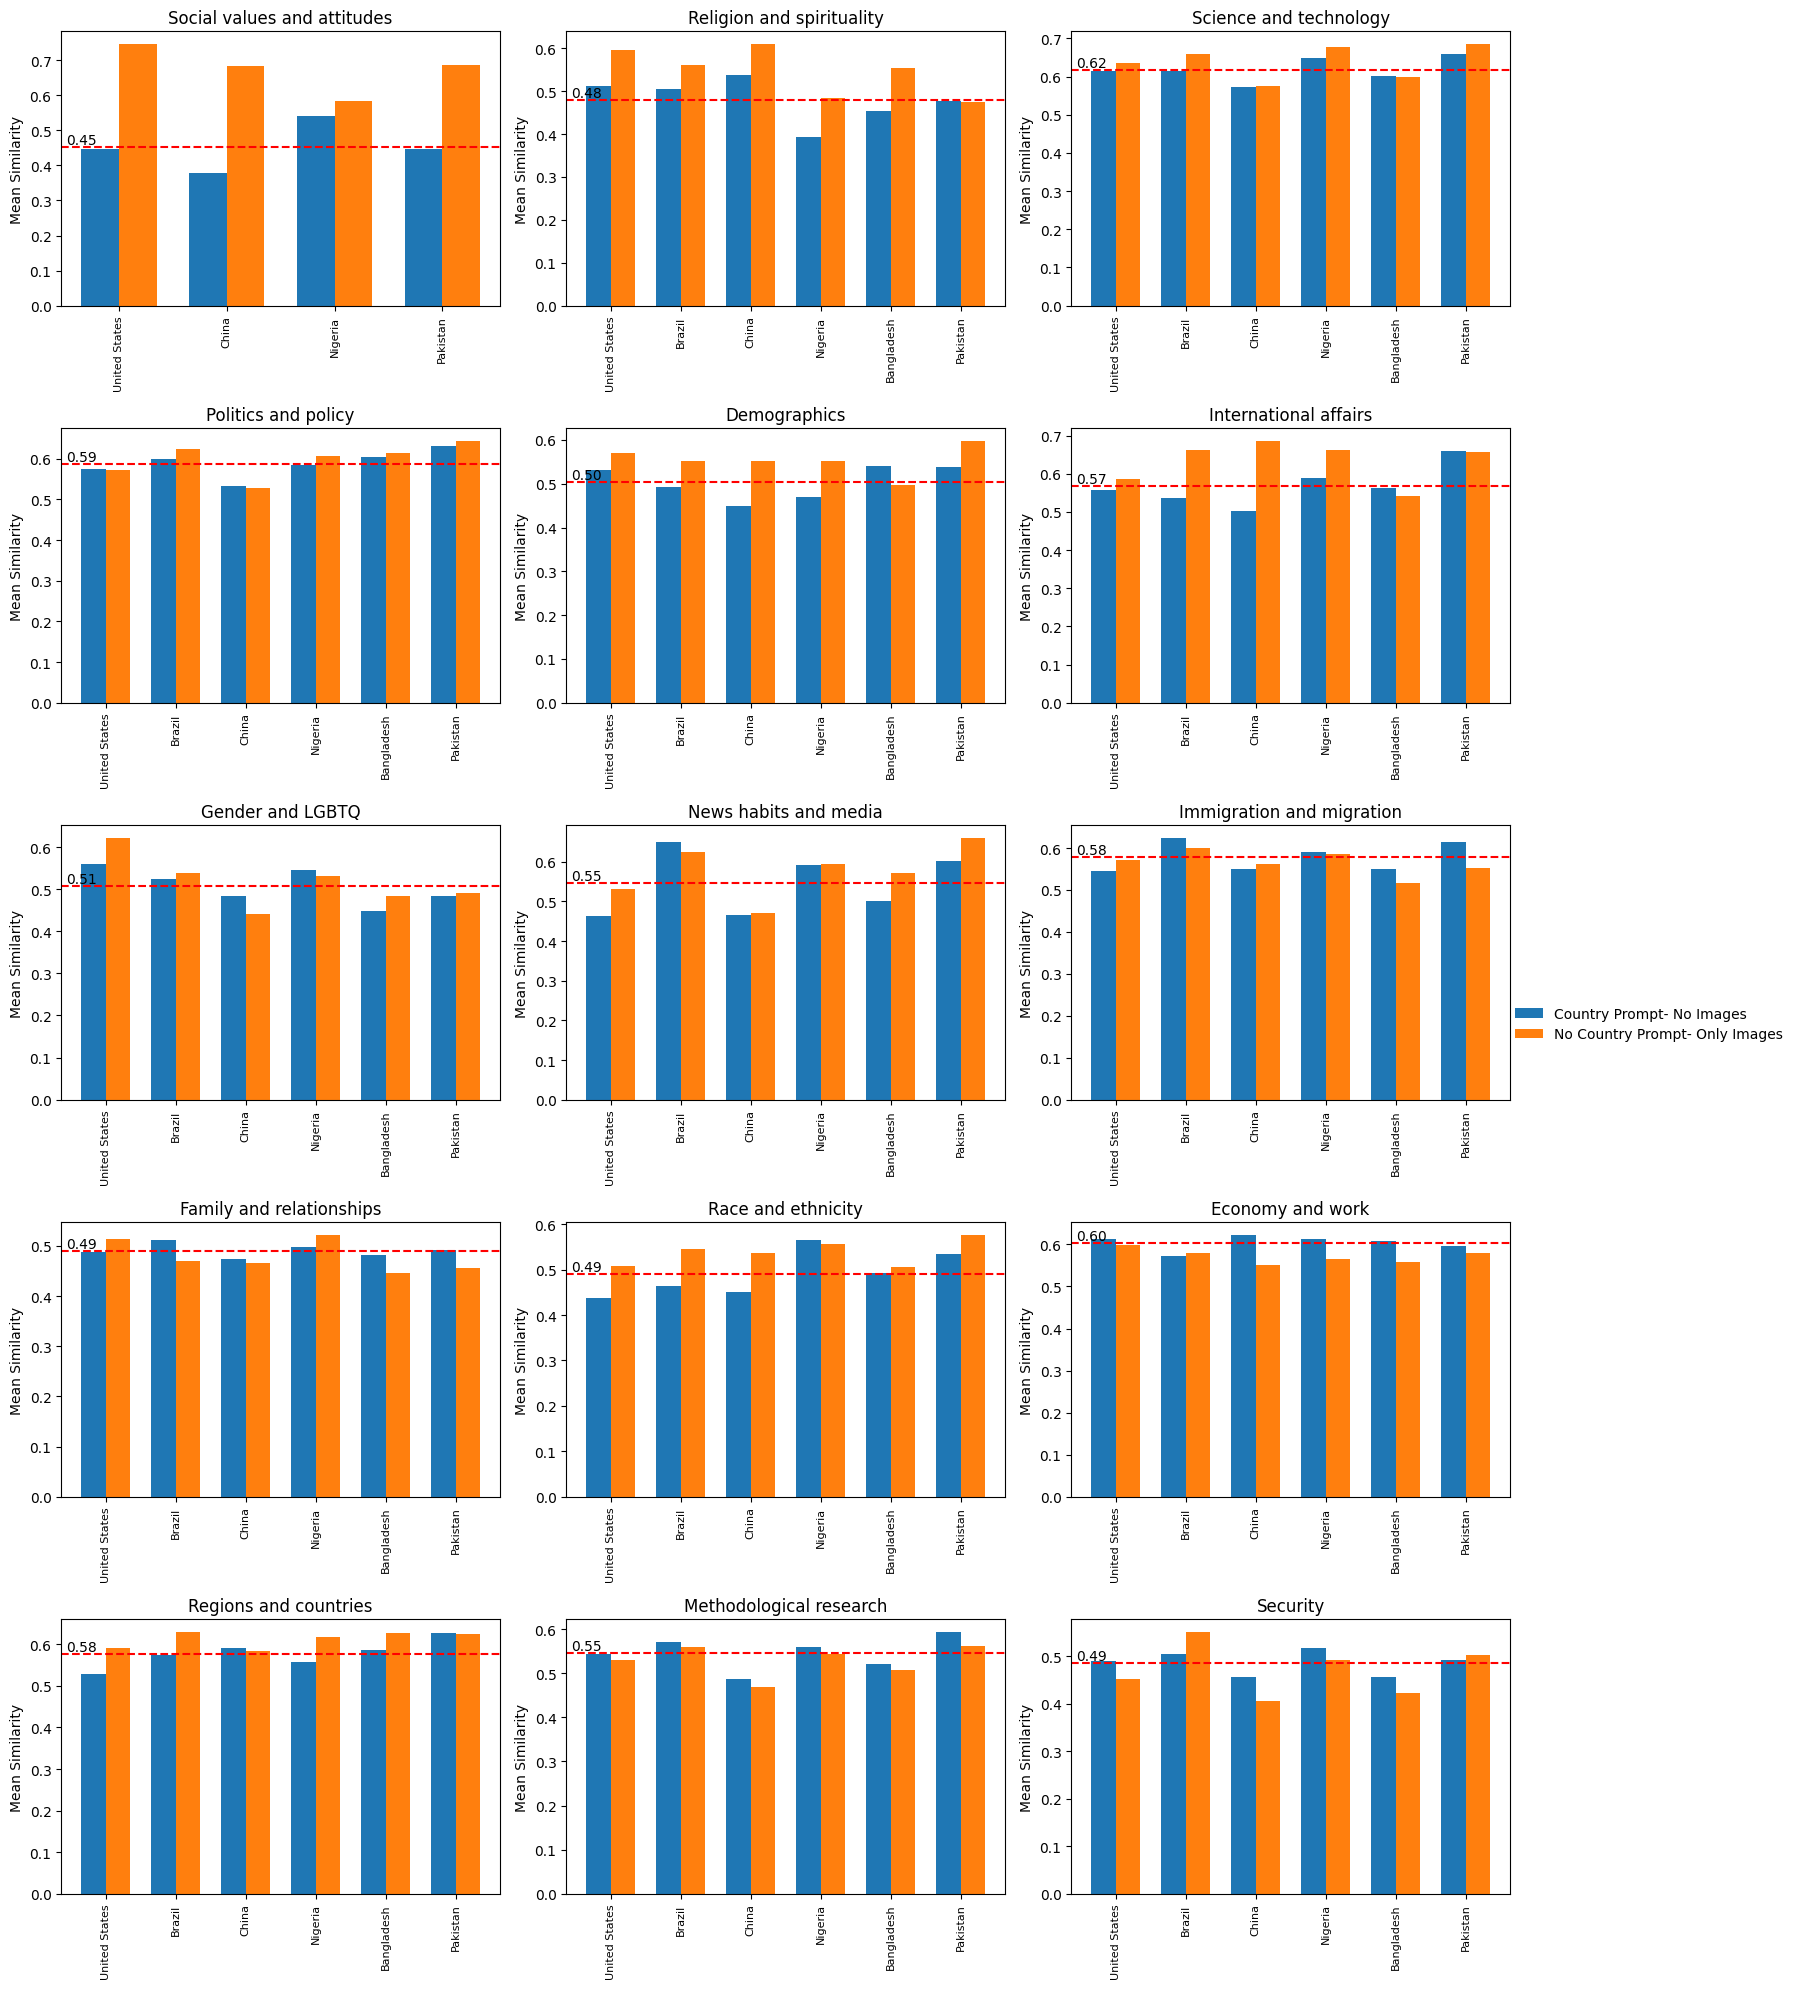

In [177]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory



# Assuming df_category_similarity is a dictionary with dataframes per topic
# and 'country_list' is defined as a list of country names in desired order

# Directory to save individual figures
individual_figures_dir = 'ds_wvs/individual_topic_figures'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(final_result['question_topic'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes


for idx, topic in enumerate(question_topics):
    df_category = df_category_similarity[topic].copy()
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' per country and Image scenario
    df_mean = df_category.groupby(['country', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot(index='country', columns='Image', values='question_topic_mean_similarity').reset_index()
    
    # Rename columns using boolean keys
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    if 'Text Similarity' not in df_pivot.columns:
        df_pivot['Text Similarity'] = np.nan
    if 'Image Similarity' not in df_pivot.columns:
        df_pivot['Image Similarity'] = np.nan
    
    # Drop countries that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort countries based on 'country_list'
    df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)

    # Drop countries that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    df_pivot = df_pivot.sort_values('country')
    
    # Data for plotting
    countries = df_pivot['country']
    text_similarities = df_pivot['Text Similarity']
    image_similarities = df_pivot['Image Similarity']
    
    x = np.arange(len(countries))  # Label locations
    width = 0.35  # Width of the bars
    
    ax = axs[idx]
    
    # Plot bars on the subplot
    ax.bar(x - width/2, text_similarities, width, label= 'Country Prompt- No Images')
    ax.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Compute the mean similarity for the topic using text-level data only
    text_mean = df_pivot['Text Similarity'].mean()
    
    # Plot horizontal red dashed line at text_mean
    ax.axhline(text_mean, color='red', linestyle='--')

    # Create a blended transformation for the subplot
    transform = blended_transform_factory(ax.transAxes, ax.transData)
    
    # Annotate the mean value on the plot
    ax.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax.get_yaxis_transform())
    
    # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
    topic_title = topic.split('.', 1)[-1].strip()
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Mean Similarity')
    ax.set_title(f'{topic_title}')
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=8)
    
    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(8, 4))
    
    # Plot bars on the individual figure
    ax_individual.bar(x - width/2, text_similarities, width, label= 'Country Prompt- No Images')
    ax_individual.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Plot horizontal red dashed line at text_mean
    ax_individual.axhline(text_mean, color='red', linestyle='--')
    
    # Annotate the mean value on the individual plot
    ax_individual.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
    # Add labels, title, and custom x-axis tick labels
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    ax_individual.set_xticks(x)
    ax_individual.set_xticklabels(countries, rotation=90)
    ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
    # Add legend to individual figure, located in the upper right corner outside the plot area
    ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    # Adjust layout to make room for the legend
    fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
    # Save individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)  # Close the figure to free memory
    
# Remove empty subplots if any
for idx in range(len(question_topics), n_rows * n_cols):
    fig.delaxes(axs[idx])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# Add a single legend on the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Save the final figure with all subplots
fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')

plt.show()


### Plot Question Topic level similarity and JSD values for each economic strate 
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

Existed! Deleted ds_wvs/individual_topic_figures_income_groups directory


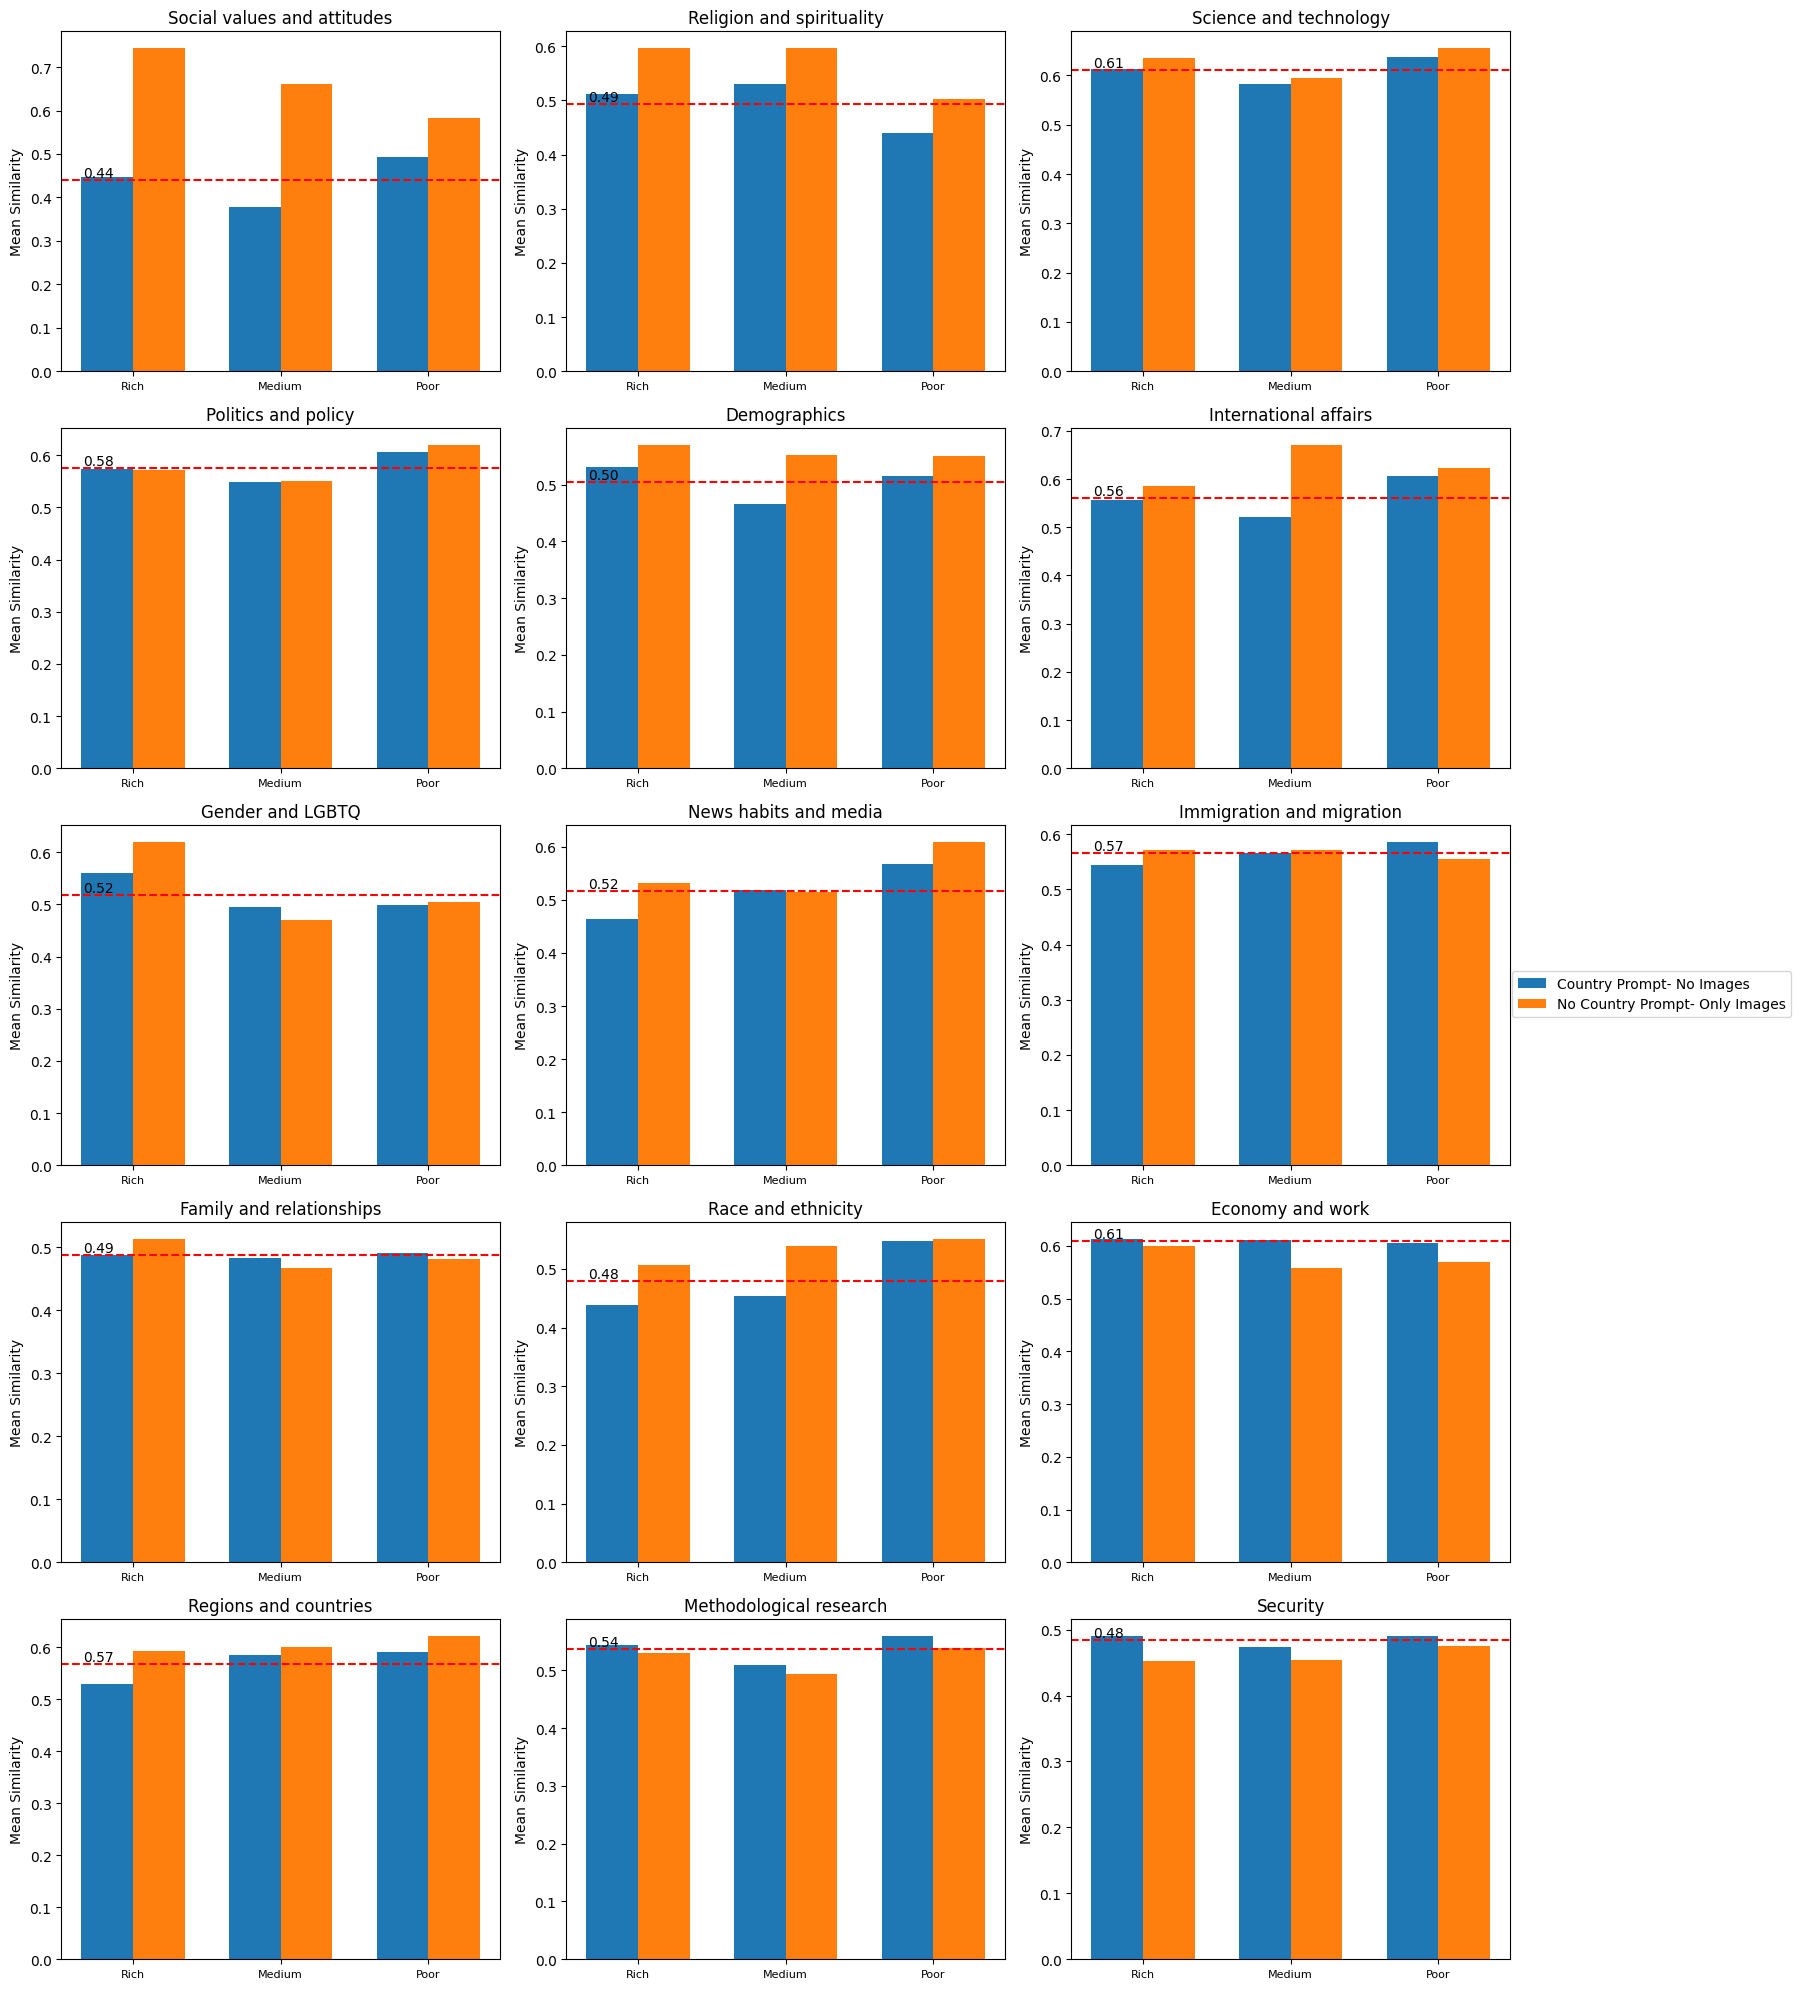

In [178]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory

# # Define income groups
# rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea"]
# medium_countries = ["Mexico", "Mongolia", "Brazil", "Colombia", "Iran", "Indonesia", "Philippines", "China"]
# poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]

# Create mapping from country to income group
country_income_group = {}
for country in ds_rich_countries:
    country_income_group[country] = 'Rich'
for country in ds_medium_countries:
    country_income_group[country] = 'Medium'
for country in ds_poor_countries:
    country_income_group[country] = 'Poor'

# Directory to save individual figures
individual_figures_dir = 'ds_wvs/individual_topic_figures_income_groups'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(final_result['question_topic'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

for idx, topic in enumerate(question_topics):
    df_category = df_category_similarity[topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' per IncomeGroup and Image scenario
    df_mean = df_category.groupby(['IncomeGroup', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot(index='IncomeGroup', columns='Image', values='question_topic_mean_similarity').reset_index()
    
    # Rename columns using boolean keys
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    if 'Text Similarity' not in df_pivot.columns:
        df_pivot['Text Similarity'] = np.nan
    if 'Image Similarity' not in df_pivot.columns:
        df_pivot['Image Similarity'] = np.nan
    
    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort IncomeGroups in the order Rich, Medium, Poor
    income_group_order = ['Rich', 'Medium', 'Poor']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)

    # Drop countries that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    df_pivot = df_pivot.sort_values('IncomeGroup')
    
    # Data for plotting
    income_groups = df_pivot['IncomeGroup']
    text_similarities = df_pivot['Text Similarity']
    image_similarities = df_pivot['Image Similarity']
    
    x = np.arange(len(income_groups))  # Label locations
    width = 0.35  # Width of the bars
    
    ax = axs[idx]
    
    # Plot bars on the subplot
    ax.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
    ax.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Compute the mean similarity for the topic using text-level data only
    text_mean = df_pivot['Text Similarity'].mean()
    
    # Plot horizontal red dashed line at text_mean
    ax.axhline(text_mean, color='red', linestyle='--')
    
    # Create a blended transformation for the subplot
    transform = blended_transform_factory(ax.transAxes, ax.transData)
    
    # Annotate the mean value on the plot (left end)
    ax.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
            ha='left', va='bottom', transform=transform)
    
    # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
    topic_title = topic.split('.', 1)[-1].strip()
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Mean Similarity')
    ax.set_title(f'{topic_title}')
    ax.set_xticks(x)
    ax.set_xticklabels(income_groups, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=8)
    
    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(6, 4))
    
    # Plot bars on the individual figure
    ax_individual.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
    ax_individual.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Plot horizontal red dashed line at text_mean
    ax_individual.axhline(text_mean, color='red', linestyle='--')
    
    # Annotate the mean value on the individual plot (left end)
    ax_individual.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
                       ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
    # Add labels, title, and custom x-axis tick labels
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    ax_individual.set_xticks(x)
    ax_individual.set_xticklabels(income_groups, rotation=0)
    ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
    # Add legend to individual figure, located in the upper right corner outside the plot area
    ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    # Adjust layout to make room for the legend
    fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
    # Save individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)  # Close the figure to free memory

# Remove empty subplots if any
for idx in range(len(question_topics), n_rows * n_cols):
    fig.delaxes(axs[idx])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# Add a single legend on the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

# Save the final figure with all subplots
fig.savefig(f'{individual_figures_dir}/final_similarity_plot_income_groups.png', bbox_inches='tight')

plt.show()


### Computer % change in similarity and JSD values for each question topic per income strata

In [179]:
# Initialize a list to store the results
results = []

for topic in question_topics:
    df_category = df_category_similarity[topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean if not already
    if df_category['Image'].dtype == object:
        df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # For each income group
    for income_group in ['Rich', 'Medium', 'Poor']:
        df_group = df_category[df_category['IncomeGroup'] == income_group]
        
        # Mean 'Text Similarity' (Image == False)
        text_similarity_mean = df_group[df_group['Image'] == False]['question_topic_mean_similarity'].mean()
        
        # Mean 'Image Similarity' (Image == True)
        image_similarity_mean = df_group[df_group['Image'] == True]['question_topic_mean_similarity'].mean()
        
        # Compute percentage change from 'Text Similarity' to 'Image Similarity'
        if text_similarity_mean != 0 and not pd.isnull(text_similarity_mean):
            percentage_change = ((image_similarity_mean - text_similarity_mean) / text_similarity_mean) * 100
        else:
            percentage_change = None  # or np.nan
        
        # Store the result
        results.append({
            'Topic': topic,
            'IncomeGroup': income_group,
            'Text Similarity IG Mean': text_similarity_mean,
            'Image Similarity IG Mean': image_similarity_mean,
            'Percentage Change': percentage_change
        })

# Convert results to DataFrame
df_variance_income_groups = pd.DataFrame(results)

df_variance_income_groups.head(4)

,Topic,IncomeGroup,Text Similarity IG Mean,Image Similarity IG Mean,Percentage Change
0,A. Social values and attitudes,Rich,0.447186,0.744907,66.576447
1,A. Social values and attitudes,Medium,0.378462,0.662036,74.927975
2,A. Social values and attitudes,Poor,0.493546,0.582897,18.103825
3,B. Religion and spirituality,Rich,0.511897,0.596313,16.490788


In [180]:
# Pivot the DataFrame to have topics as columns and similarity and percentage change as rows
df_pivot_topicwise = df_variance_income_groups.pivot(index='IncomeGroup', columns='Topic', values=['Text Similarity IG Mean', 'Image Similarity IG Mean', 'Percentage Change'])

# Flatten the MultiIndex columns
df_pivot_topicwise.columns = ['_'.join(col).strip() for col in df_pivot_topicwise.columns.values]

# Display the updated DataFrame with only % change columns
df_pivot_topicwise = df_pivot_topicwise.filter(like='Percentage Change', axis=1)
df_pivot_topicwise = df_pivot_topicwise.reindex(['Rich', 'Medium', 'Poor'])
df_pivot_topicwise

,Percentage Change_A. Social values and attitudes,Percentage Change_B. Religion and spirituality,Percentage Change_C. Science and technology,Percentage Change_D. Politics and policy,Percentage Change_E. Demographics,Percentage Change_G. International affairs,Percentage Change_I. Gender and LGBTQ,Percentage Change_J. News habits and media,Percentage Change_K. Immigration and migration,Percentage Change_L. Family and relationships,Percentage Change_M. Race and ethnicity,Percentage Change_N. Economy and work,Percentage Change_O. Regions and countries,Percentage Change_P. Methodological research,Percentage Change_Q. Security
IncomeGroup,,,,,,,,,,,,,,,
Rich,66.576447,16.490788,3.434758,-0.556375,7.424565,4.978556,10.747925,14.597187,5.027982,5.373900,15.780172,-2.319445,11.930049,-2.404116,-7.954980
Medium,74.927975,12.707316,2.259534,0.441993,18.525061,28.643605,-5.226375,-0.783652,0.668947,-3.280138,18.615348,-8.693785,2.685468,-3.137299,-4.081648
Poor,18.103825,13.989576,2.903631,2.415448,7.078565,2.951437,1.375066,7.424235,-5.369638,-2.203870,0.891838,-6.157841,5.443151,-3.843448,-3.146531


In [181]:
# for each unique country, there is a column 'income'. It has tensor values e.g. tensor(174, dtype=torch.float64). I want to plot a historgram of these values for a) per country b) per income group

## Plot distribution of income 

In [182]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch import Tensor
import re

# Directory to save individual figures
individual_figures_income_dist = 'ds_wvs/individual_topic_figures_income_distribution'
if os.path.exists(individual_figures_income_dist):
    shutil.rmtree(individual_figures_income_dist)
    print(f"Existed! Deleted {individual_figures_income_dist} directory")
os.makedirs(individual_figures_income_dist, exist_ok=True)


Existed! Deleted ds_wvs/individual_topic_figures_income_distribution directory


In [183]:
# Step 1: Extract numerical income values from tensors

def extract_income_value(tensor_value):
    if isinstance(tensor_value, str):
        # Use regex to extract the number inside 'tensor(...)'
        match = re.search(r'tensor\(([\d\.\-e]+)', tensor_value)
        if match:
            return float(match.group(1))
        else:
            return np.nan  # or raise an error if appropriate
    elif isinstance(tensor_value, torch.Tensor):
        return tensor_value.item()
    else:
        return float(tensor_value)

# Apply the function to the 'income' column
df_category['income_value'] = df_category['income'].apply(extract_income_value)

# Since 'income_value' is the same for each country regardless of 'Image', get unique countries and their incomes
country_income_df = df_category[['country', 'img_id', 'income_value']].drop_duplicates()

# Verify if 'income_value' is unique per country
unique_incomes = country_income_df.groupby(['country', 'img_id'])['income_value'].nunique()
if unique_incomes.max() > 1:
    print("Warning: Some countries have multiple income values.")

In [184]:
# Step 2: Sort countries based on 'income_value' in descending order
country_income_df_sorted = country_income_df.sort_values('income_value', ascending=False).reset_index(drop=True)


In [185]:
country_income_df_sorted.head(10)

,country,img_id,income_value
0,China,5d4be817cf0b3a0f3f346971,10097.7218
1,China,5d4be812cf0b3a0f3f3468d7,10097.7218
2,United States,5d4bebd8cf0b3a0f3f34cfb3,4650.0000
3,China,5d4be826cf0b3a0f3f346abf,4608.9463
4,Pakistan,5d4be000cf0b3a0f3f3388d0,4440.0000
5,Nigeria,5d4be00fcf0b3a0f3f338a22,3750.0000
6,China,5d4bf2a9cf0b3a0f3f358aa8,3704.3273
7,United States,5d4be3d8cf0b3a0f3f33f085,3450.0000
8,Brazil,5d4be1bacf0b3a0f3f33b8af,3356.0000
9,China,5d4be820cf0b3a0f3f346a6f,3318.4413


#### Per Country

Saved sorted income histograms per country at: ds_wvs/individual_topic_figures_income_distribution/sorted_income_per_country.png


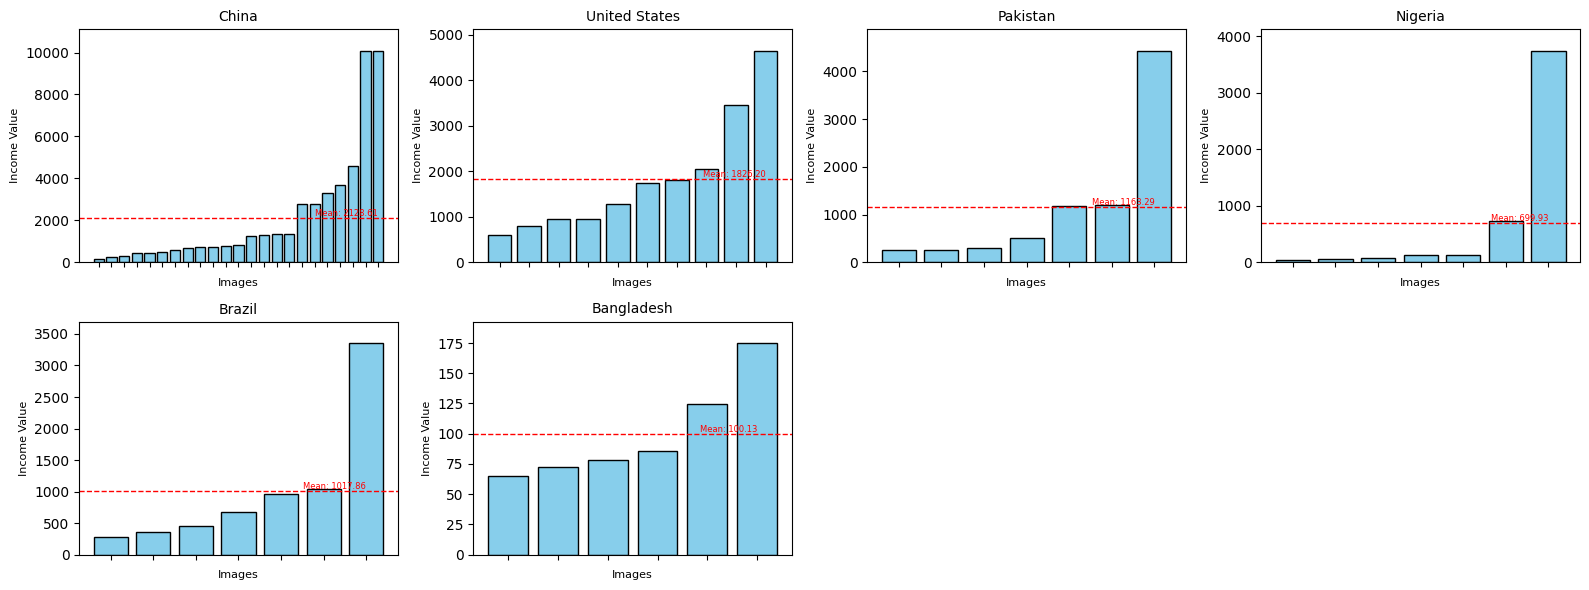

In [186]:
# Step 3: Create per-country subplots showing income
import math

# Get list of unique countries
unique_countries = country_income_df_sorted['country'].unique()
num_countries = len(unique_countries)

# Determine subplot grid size (e.g., 4 columns)
n_cols = 4
n_rows = math.ceil(num_countries / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axs = axs.flatten()

for idx, country in enumerate(unique_countries):
    ax = axs[idx]
    df_country = country_income_df_sorted[country_income_df_sorted['country'] == country]
    
    # Sort images by income_value ascendingly
    df_country_sorted = df_country.sort_values('income_value', ascending=True)
    
    images = df_country_sorted['img_id']
    incomes = df_country_sorted['income_value']
    
    ax.bar(images, incomes, color='skyblue', edgecolor='black')
    ax.set_title(country, fontsize=10)
    ax.set_ylim(0, incomes.max() * 1.1)
    ax.set_xlabel('Images', fontsize=8)
    ax.set_ylabel('Income Value', fontsize=8)
    ax.tick_params(axis='x', rotation=90, labelsize=0)
    # dont show x-axis labels
    ax.set_xticklabels([])
    
    # Annotate income values
    # for i, v in enumerate(incomes):
    #     ax.text(i, v + incomes.max() * 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
    
    # Add horizontal line for mean income of the country
    mean_income = incomes.mean()
    ax.axhline(mean_income, color='red', linestyle='--', linewidth=1)
    ax.text(len(images)-1, mean_income, f'Mean: {mean_income:.2f}', color='red', ha='right', va='bottom', fontsize=6)

# Remove any unused subplots
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

# Save the figure
histogram_plot_path =  os.path.join(individual_figures_income_dist, 'sorted_income_per_country.png')
plt.savefig(histogram_plot_path, bbox_inches='tight')
print(f"Saved sorted income histograms per country at: {histogram_plot_path}")

plt.show()


#### Per Income Group

Saved sorted income histograms per income group at: ds_wvs/individual_topic_figures_income_distribution/sorted_income_histograms_per_income_group.png


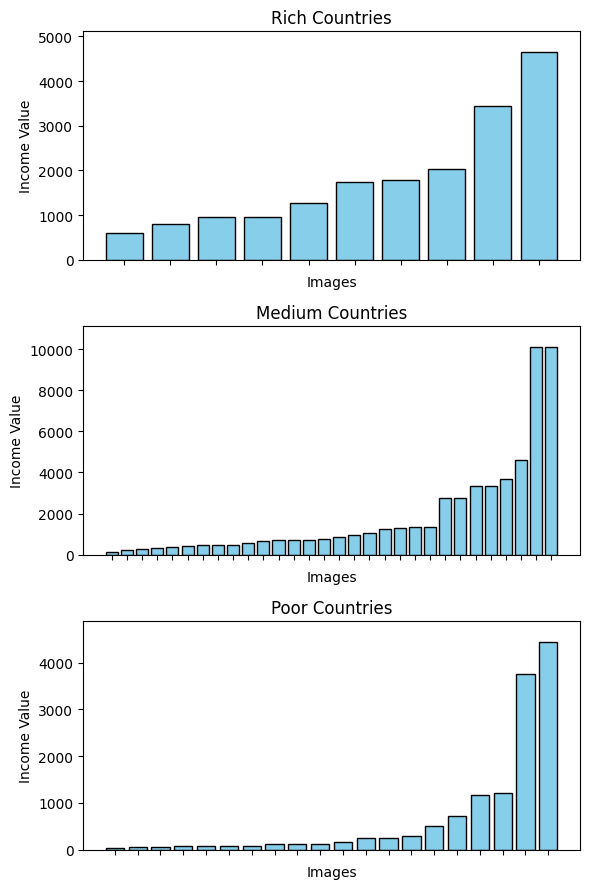

In [187]:
# Step 2: Create sorted bar plots of income values per income group

import math
# Add IncomeGroup to country_income_df
country_income_df['IncomeGroup'] = country_income_df['country'].map(country_income_group)

# Remove any countries without an income group
country_income_df = country_income_df.dropna(subset=['IncomeGroup'])

# Get list of income groups
income_groups = ['Rich', 'Medium', 'Poor']

# Create subplots for each income group
n_cols = 1
n_rows = len(income_groups)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6, 3 * n_rows), sharex=False)
if n_rows == 1:
    axs = [axs]

for idx, group in enumerate(income_groups):
    ax = axs[idx]
    df_group = country_income_df[country_income_df['IncomeGroup'] == group]
    
    # Sort by income_value ascendingly
    df_group_sorted = df_group.sort_values('income_value', ascending=True)
    
    images = df_group_sorted['img_id']
    incomes = df_group_sorted['income_value']
    
    ax.bar(images, incomes, color='skyblue', edgecolor='black')
    ax.set_title(f'{group} Countries', fontsize=12)
    ax.set_ylim(0, incomes.max() * 1.1)
    ax.set_xlabel('Images', fontsize=10)
    ax.set_ylabel('Income Value', fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.set_xticklabels([])
    
    # # Annotate income values
    # for i, v in enumerate(incomes):
    #     ax.text(i, v + incomes.max() * 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=7)
    
    # Add horizontal line for mean income of the group
    # mean_income = incomes.mean()
    # ax.axhline(mean_income, color='red', linestyle='--', linewidth=1)
    # ax.text(len(images)-1, mean_income, f'Mean: {mean_income:.2f}', color='red', ha='right', va='bottom', fontsize=8)

plt.tight_layout()
histogram_plot_path = os.path.join(individual_figures_income_dist, 'sorted_income_histograms_per_income_group.png')
plt.savefig(histogram_plot_path, bbox_inches='tight')
print(f"Saved sorted income histograms per income group at: {histogram_plot_path}")
plt.show()


### Show the income distribution in one single plots

Saved income distribution per country at: ds_wvs/individual_topic_figures_income_distribution/income_swarm_distribution_per_country.png


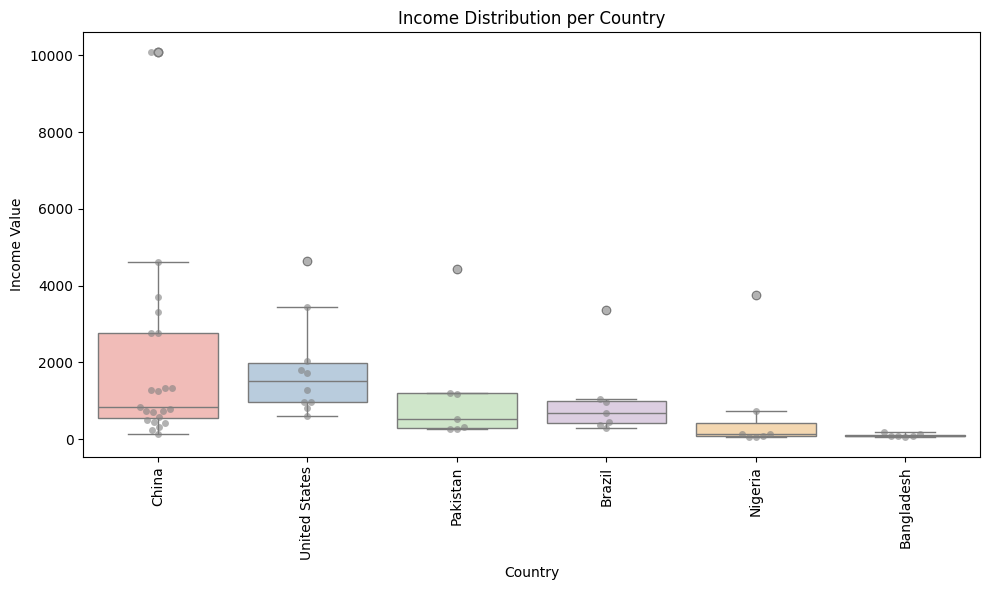

In [188]:

# Apply the function to the 'income' column
df_category['income_value'] = df_category['income'].apply(extract_income_value)

# Get all images per country
country_income_df = df_category[['country', 'img_id', 'income_value']].drop_duplicates()

# Verify if 'income_value' is unique per country and img_id
unique_incomes = country_income_df.groupby(['country', 'img_id'])['income_value'].nunique()
if unique_incomes.max() > 1:
    print("Warning: Some countries have multiple income values.")

# Add IncomeGroup
country_income_df['IncomeGroup'] = country_income_df['country'].map(country_income_group)

# Remove any countries without an income group
country_income_df = country_income_df.dropna(subset=['IncomeGroup'])

# Sort countries by mean income
country_mean_income = country_income_df.groupby('country')['income_value'].mean().sort_values(ascending=False).index
country_income_df['country'] = pd.Categorical(country_income_df['country'], categories=country_mean_income, ordered=True)

# Plot combined income distribution and country-level data
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='income_value', data=country_income_df, order=country_mean_income, palette='Pastel1')
sns.swarmplot(x='country', y='income_value', data=country_income_df, color='gray', alpha=0.6, order=country_mean_income)

plt.xlabel('Country')
plt.ylabel('Income Value')
plt.title('Income Distribution per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plot_path = os.path.join(individual_figures_income_dist, 'income_swarm_distribution_per_country.png')
plt.savefig(plot_path, bbox_inches='tight')
print(f"Saved income distribution per country at: {plot_path}")
plt.show()

# Save the plot
